# Телекоммуникации

<p><strong>Описание проекта</strong></p>
<p>Оператор связи &laquo;Ниединогоразрыва.ком&raquo; хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.</p>

<p><strong>Цель проекта</strong></p>
<p>Необходимо построить модель машинного обучения для выявления оттока клиентов.</p>

<p><strong>Описание услуг</strong></p>
<p>Оператор предоставляет два основных типа услуг:</div>
<ol start="1">
<li>Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.</li>
<li>Интернет. Подключение может быть двух типов: через телефонную линию (DSL<em>,</em> от англ. <em>digital subscriber line</em>, &laquo;цифровая абонентская линия&raquo;) или оптоволоконный кабель (<em>Fiber optic</em>).</li>
</ol>
<p>Также доступны такие услуги:</div>
<ul>
<li>Интернет-безопасность: антивирус (<em>DeviceProtection</em>) и блокировка небезопасных сайтов (<em>OnlineSecurity</em>);</li>
<li>Выделенная линия технической поддержки (<em>TechSupport</em>);</li>
<li>Облачное хранилище файлов для резервного копирования данных (<em>OnlineBackup</em>);</li>
<li>Стриминговое телевидение (<em>StreamingTV</em>) и каталог фильмов (<em>StreamingMovies</em>).</li>
</ul>
<p>За услуги клиенты могут платить каждый месяц или заключить договор на 1&ndash;2 года. Доступны различные способы расчёта и возможность получения электронного чека.</div>

## План проекта

<ul>
<li>Подготовка:
<ul>
<li>Импорт библиотек;</li>
<li>Загрузка данных.</li>
</ul>
</li>
<li>Первичный анализ данных:
<ul>
<li>Инфо по таблицам , явные дубликаты, пропущенные значения, типы данных;</li>
<li>Гистограммы признаков;</li>
<li>Предварительные выводы;</li>
<li>Уточнающие вопросы.</li>
</ul>
</li>
<li>Код решения:
<ul>
<li>Объединение выборок;</li>
<li>Feature Engineering;</li>
<li>EDA;</li>
<li>Визуализация признаков;</li>
<li>Анализ признаков на мультиколлинеарность;</li>
<li>Проверка на дисбаланс классов;</li>
<li>Разбиение выборки;</li>
<li>Кодирование признаков;</li>
<li>Построение модели;</li>
<li>Подбор гиперпараметров;</li>
<li>Проверка качества модели на тестовой выборке;</li>
<li>Анализ важности признаков;</li>
<li>Матрица ошибок.</li>
</ul>
</li>
<li>Вывод.</li>
</ul>
<p>&nbsp;</p>

## Подготовка данных

### Импорт библиотек

In [ ]:
!pip install phik

In [ ]:
!pip install catboost

In [ ]:
!pip install lightgbm

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

import phik
from phik.report import plot_correlation_matrix
from phik import report

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import catboost
import lightgbm

from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Загрузка данных

In [ ]:
try:
    contract = pd.read_csv('/datasets/contract_new.csv')
    personal = pd.read_csv('/datasets/personal_new.csv')
    internet = pd.read_csv('/datasets/internet_new.csv')
    phone = pd.read_csv('/datasets/phone_new.csv')
except:
    contract = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv')
    personal = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')
    internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')
    phone = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')


### Первичный анализ данных

функция для инфо и явных дубликатов

In [ ]:
def dfs(df):
    print(df.info())
    print('\n\nДубликаты:', df.duplicated().sum())

### Contract

In [ ]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [ ]:
dfs(contract)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None


Дубликаты: 0


<p> Таблица имеет 7043 строки, явных дубликатов и пропусков не наблюдается</p>
<p>Необходимо изменить тип данных у `BeginDate` на datetime, `TotalCharges` на float64.
`EndDate` - по всей видимости, целевой признак.</p>

In [ ]:
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])

In [ ]:
print('Самая ранняя дата', contract['BeginDate'].min())
print('Последняя дата', contract['BeginDate'].max())

Самая ранняя дата 2013-10-01 00:00:00
Последняя дата 2020-02-01 00:00:00


In [ ]:
contract.query('BeginDate=="2020-02-01"')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


In [ ]:
contract.query('TotalCharges==" "')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


<p>Тип столбца `TotalCharges` не менялся, оказались пробелы в 11 строках.</p>
<p>Вижу 3 варианта решения:</p>

<ul>
<li>Заменить пробелы на данные из `MonthlyCharges`, так как пользователи новые, договор заключен только что и, возможно, MonthlyCharges = TotalCharges, так как это все деньги, которые они успели внести;</li>
<li>Заменить пробелы средним значением из `TotalCharges`, рассчитанным с учетом заключенного котракта сроком на 2 года и ежемесячной платой;</li>
<li>Удалить строки, тк их всего 11.</li>
</ul>

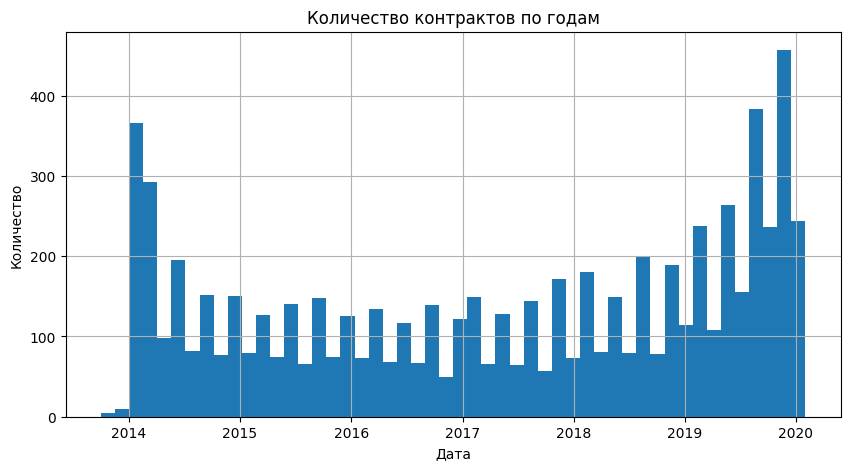

In [ ]:
contract.BeginDate.hist(figsize=(10,5), bins=50)
plt.title('Количество контрактов по годам')
plt.ylabel('Количество')
plt.xlabel('Дата')
plt.show()

Наибольшее количество контрактов заключено в конце 2019 года, судя по началу 2020 года можно предположить тенденцию к последующему росту числа клиентов. В начале 2014 года также виден скачок(возможно, новый контракт интересный, хорошая рекламная кампания, все быстренько подключились) Последуюший спад связан, скорее всего, с выходом новых линеек продуктов в других компаниях, осмыслении своего контракта, окончании периода скидок и т.д.

In [ ]:
contract.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

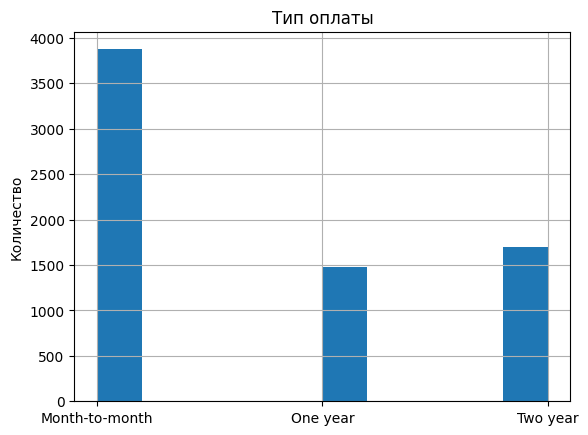

In [ ]:
contract.Type.hist()
plt.title('Тип оплаты')
plt.ylabel('Количество')
plt.show()


Наибольшее количество клиентов с помесячной оплатой. В срезе оплаты за 1 и 2 года лидирует оплата за 2 года(возможно, более выгодные условия тарифа)

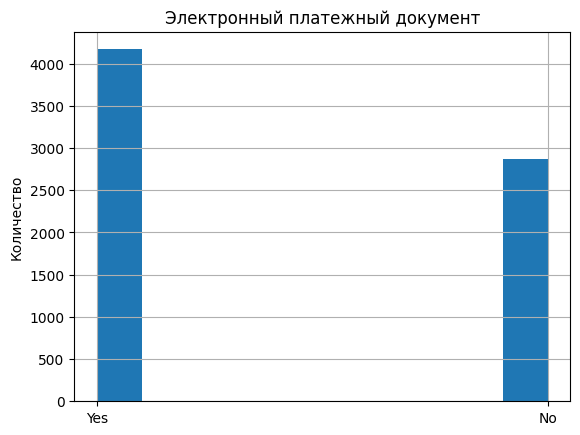

In [ ]:
contract.PaperlessBilling.hist()
plt.title('Электронный платежный документ')
plt.ylabel('Количество')
plt.show()

Большая часть клиентов использует электронный платежный документ (это удобнее и экологичнее)

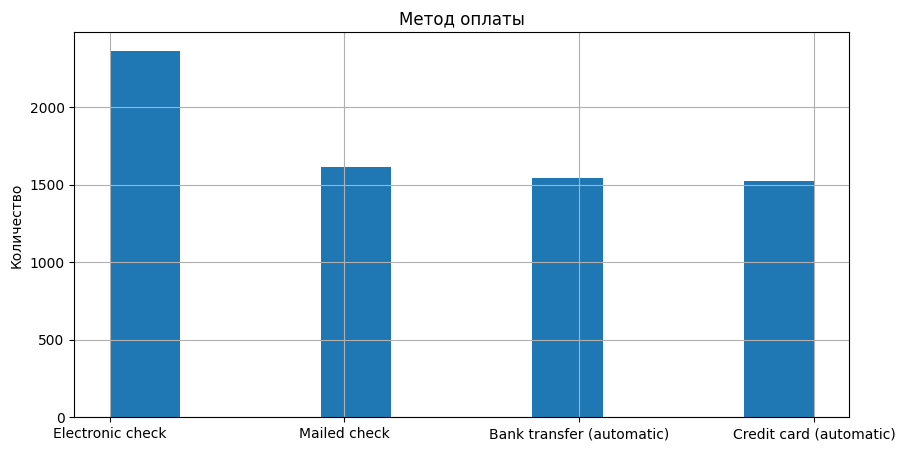

In [ ]:
contract.PaymentMethod.hist(figsize=(10,5))
plt.title('Метод оплаты')
plt.ylabel('Количество')
plt.show()

Большинство пользователей выбирают электронный чек, автоматические списания пользуются меньшей популярностью.

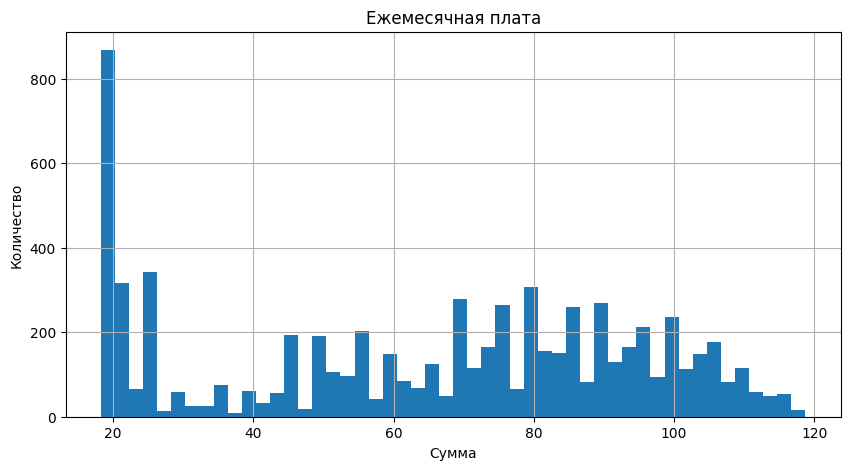

In [ ]:
contract.MonthlyCharges.hist(figsize=(10,5), bins=50)
plt.title('Ежемесячная плата')
plt.ylabel('Количество')
plt.xlabel('Сумма')
plt.show()


In [ ]:
contract.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

У большинства пользователей ежемесячная плата составляет менее 20 условных единиц, среднее значение колеблется в районе 65, медиана 70 (есть выброс), максимальная месячная плата составила ~119 у.е.

Сводная таблица в разрезе типа оплаты

In [ ]:
contract.pivot_table(index='Type', values='MonthlyCharges')

,MonthlyCharges
Type,
Month-to-month,66.398490
One year,65.048608
Two year,60.770413


Ежемесячная оплата дороже оплаты сразу за 2 года.

### Personal

In [ ]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [ ]:
dfs(personal)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


Дубликаты: 0


Таблица имеет 7043 строки, явных дубликатов и пропусков не обнаружено.

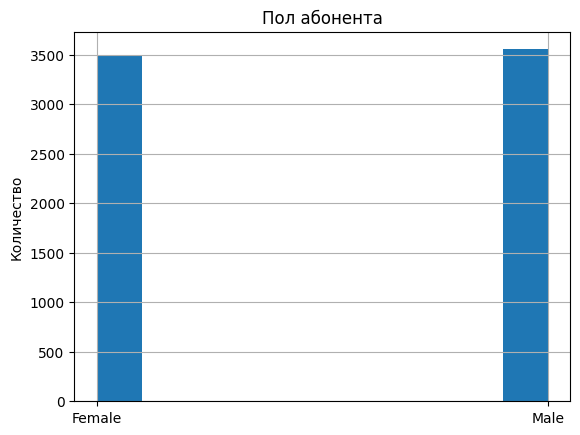

In [ ]:
personal.gender.hist()
plt.title('Пол абонента')
plt.ylabel('Количество')
plt.show()

In [ ]:
personal.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Распределение по полам практически одинаково

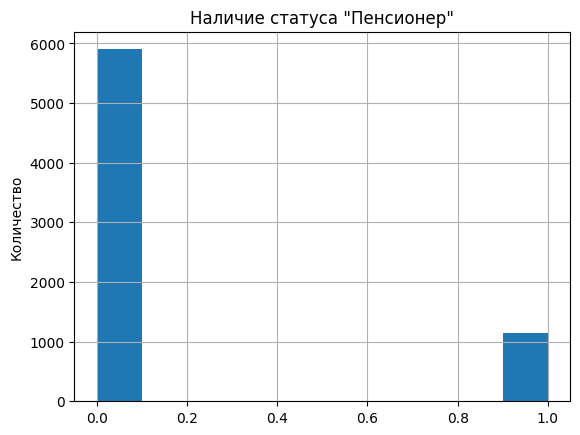

In [ ]:
personal.SeniorCitizen.hist()
plt.title('Наличие статуса "Пенсионер"')
plt.ylabel('Количество')
plt.show()

In [ ]:
personal.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Клиентов пенсионного возраста в 6 раз меньше непенсионеров.

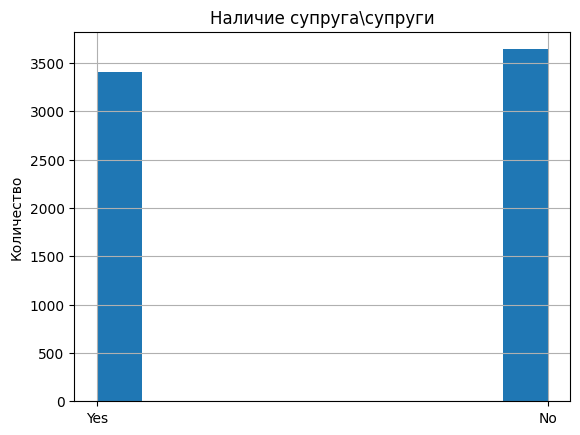

In [ ]:
personal.Partner.hist()
plt.title('Наличие супруга\супруги')
plt.ylabel('Количество')
plt.show()

In [ ]:
personal.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

Женатых и неженатых клиентов, практически, одинаковое количество с небольшим перевесом в сторону холостяков.

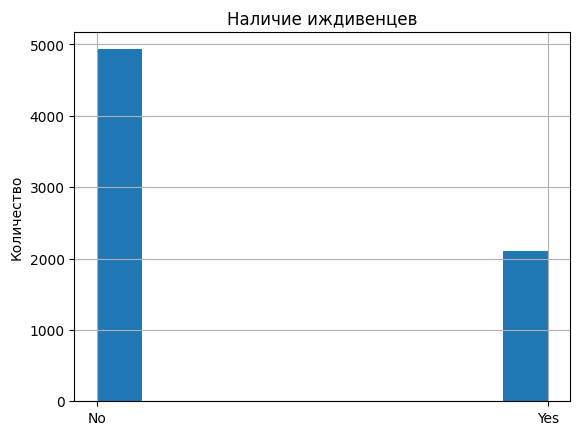

In [ ]:
personal.Dependents.hist()
plt.title('Наличие иждивенцев')
plt.ylabel('Количество')
plt.show()

Наблюдаем отсутствие иждивенцев у большей части клиентов.

### Internet

In [ ]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [ ]:
dfs(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None


Дубликаты: 0


5517 клиентов используют Интернет компании, дубликатов и пропусков не обнаружено.

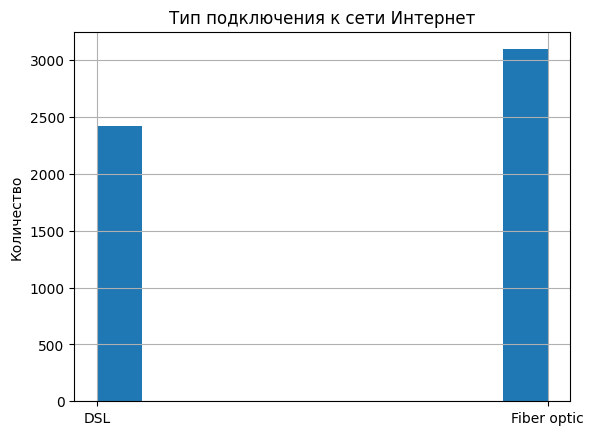

In [ ]:
internet.InternetService.hist()
plt.title('Тип подключения к сети Интернет')
plt.ylabel('Количество')
plt.show()

Большая часть клиентов выбирает оптоволокно.

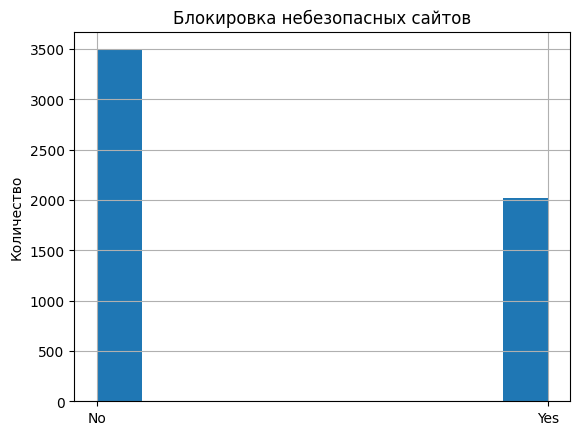

In [ ]:
internet.OnlineSecurity.hist()
plt.title('Блокировка небезопасных сайтов')
plt.ylabel('Количество')
plt.show()

Доп опцию по блокировке небезопасных сайтов выбирает меньшая часть клиентов.

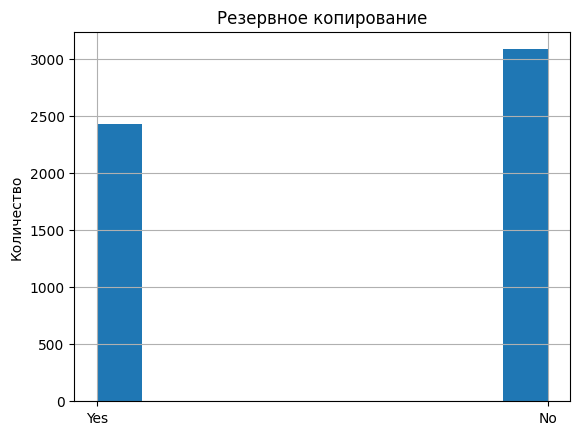

In [ ]:
internet.OnlineBackup.hist()
plt.title('Резервное копирование')
plt.ylabel('Количество')
plt.show()

Опцию резервного копирования выбирает меньшее количество пользователей.

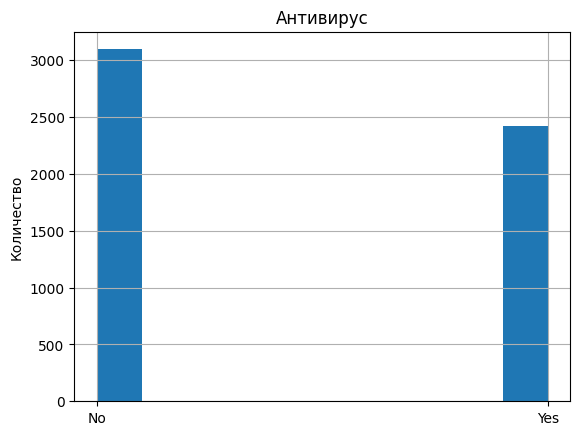

In [ ]:
internet.DeviceProtection.hist()
plt.title('Антивирус')
plt.ylabel('Количество')
plt.show()

Антивирус использует меньшее число клиентов.

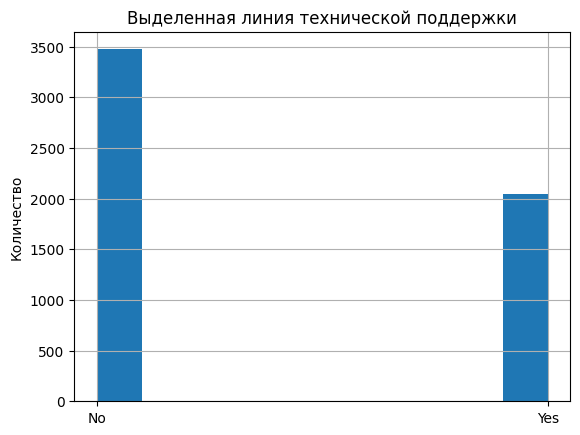

In [ ]:
internet.TechSupport.hist()
plt.title('Выделенная линия технической поддержки')
plt.ylabel('Количество')
plt.show()

Выделенной линией технической поддержки пользуется меньшее число клиентов.

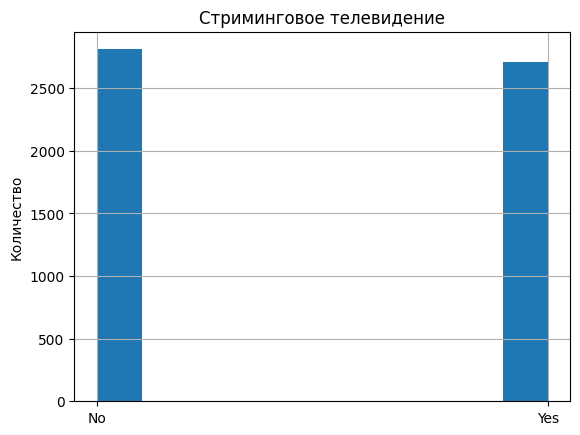

In [ ]:
internet.StreamingTV.hist()
plt.title('Стриминговое телевидение')
plt.ylabel('Количество')
plt.show()

Стриминговое телевидение использует, примерно, половина клиентов.

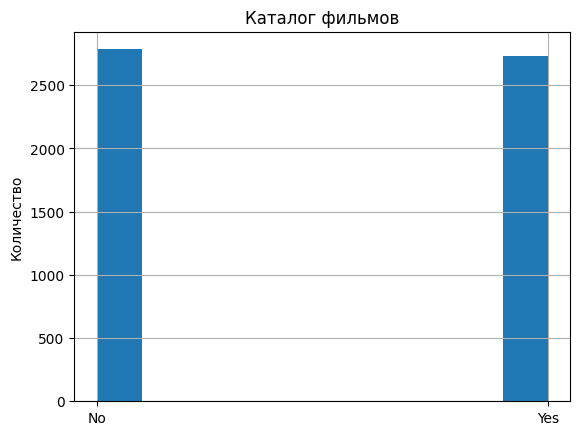

In [ ]:
internet.StreamingMovies.hist()
plt.title('Каталог фильмов')
plt.ylabel('Количество')
plt.show()

Каталог фильмов подключен у половины клиентов.

### Phone

In [ ]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [ ]:
dfs(phone)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None


Дубликаты: 0


Стационарную телефонную связь используют 6361 клиент, явнов дубликатов и пропусков не обнаружено.

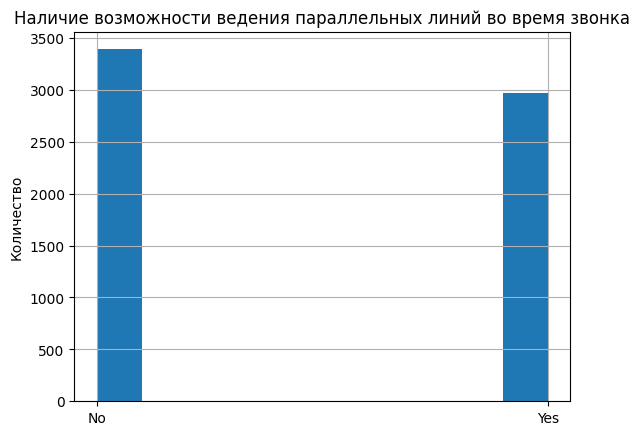

In [ ]:
phone.MultipleLines.hist()
plt.title('Наличие возможности ведения параллельных линий во время звонка')
plt.ylabel('Количество')
plt.show()

Доп опцию в виде наличия возможности ведения параллельных линий во время звонка используют меньше половины клиентов.

### Предварительные выводы

<p>Мы имеем данные из 4 таблиц по 7043 клиентам, из которых:</p>
<ul>
<li>5517 используют интернет;</li>
<li>6361 пользуются телефонией.</li>
</ul>
<p>Все таблицы имеют следующие столбцы:</p>
<ul>
<li>BeginDate - дата начала пользования услугами;</li>
<li>EndDate - дата окончания пользования услугами;</li>
<li>Type - тип оплаты: ежемесячный, годовой и тд;</li>
<li>PaperlessBilling - электронный платёжный документ;</li>
<li>PaymentMethod - способ оплаты;</li>
<li>MonthlyCharges - ежемесячные траты на услуги;</li>
<li>TotalCharges - всего потрачено денег на услуги;</li>
<li>Dependents - наличие иждивенцев;</li>
<li>Senior Citizen - наличие пенсионного статуса по возрасту;</li>
<li>Partner - наличие супруга(и);</li>
<li>Gender - пол клиента;</li>
<li>InternetService -тип подключения к сети Интернет;</li>
<li>OnlineSecurity - блокировка небезопасных сайтов;</li>
<li>OnlineBackup - резервное копирование;</li>
<li>DeviceProtection - антивирус;</li>
<li>TechSupport - выделенная линия технической поддержки;</li>
<li>StreamingTV - стриминговое телевидение;</li>
<li>StreamingMovies - каталог фильмов;</li>
<li>MultipleLines &ndash; наличие возможности ведения параллельных линий во время звонка.</li>
</ul>
<p>Целевой признак `EndDate`. Необходимо будет изменить эту колонку на churn, где есть дата поставить 1, где нет даты поставить 0.</p>
<p>Тип данных изменен у `BeginDate` на дату.</p>
<p>Следует изменить тип данных `TotalCharges` на float после обработки 11 пропущенных значений, связанных с тем, что дата начала действия контракта совпадает с окончанием периода наблюдений.</p>
<p>Данные предоставлены за период с 2013-10-01 по&nbsp;2020-02-01 (6 лет, 5 месяцев), оплата взымается 1 числа месяца.</p>
<p>Наибольшее количество контрактов заключено в конце 2019 года, судя по началу 2020 года можно предположить тенденцию к последующему росту числа клиентов.</p>
<p>Большая часть клиентов использует помесячную оплату, электронный платежный документ и выставление счета в электронном виде.</p>
<p>У большинства пользователей ежемесячная плата составляет менее 20 условных единиц, среднее значение колеблется в районе 65, медиана 70 (есть выброс), максимальная месячная плата составила ~119 у.е., также, помесячная оплата больше оплаты за 2 года вперед.</p>
<p>Пресональные данные абонентов выглядят следующим образом:</p>
<ul>
<li>гендер распределился равномерно;</li>
<li>количество пенсионеров в 6 раз меньше молодых людей;</li>
<li>наличие или отсутствие партнера примерно одинаково;</li>
<li>отсутствие иждивенцев у большей части клиентов.</li>
</ul>
<p>Большая часть клиентов использует оптоволокно.</p>
<p>Доп опции, как в линейке интернет, так и в телефонии выбирают меньшее количество пользователей.</p>
<p>&nbsp;</p>

### Уточнающие вопросы

Вопросов нет.

## Код решения

### Объединение выборок

In [ ]:
df = contract.merge(personal, how='left', on='customerID')\
.merge(internet, how='left', on='customerID')\
.merge(phone, how='left', on='customerID')
df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,2035.2,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7430.4,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,325.6,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,NaN
7041,8361-LTMKD,2019-07-01,No,Month-to-month,Yes,Mailed check,74.40,520.8,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


In [ ]:
df.shape

(7043, 20)

### Замена пропусков

In [ ]:
df.isnull().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

Заменим пропуски на 'NotUsed', в столбце `TotalCharges` есть 11 пропусков, удалим строки, из столбца `EndDate` сформируем целевой признак `Churn`, добавим признак `DaysNumber` количество дней, затем удалим столбцы с датами.

In [ ]:
df=df.fillna('NotUsed')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

In [ ]:
df = df.loc[df.TotalCharges!=' ']
df.shape

(7032, 20)

### Добавление новыx столбцов

In [ ]:
df.TotalCharges = df.TotalCharges.astype(float)

Приведем названия столбцов к нижнему регистру, а то работать неудобно

In [ ]:
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['customerid', 'begindate', 'enddate', 'type', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'gender',
       'seniorcitizen', 'partner', 'dependents', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'multiplelines'],
      dtype='object')

Добавим новый столбец - целевой признак `churn`

In [ ]:
df['churn'] = (df.enddate!= 'No').astype(int)
display(df.churn.value_counts())
display(df.columns)

0    5931
1    1101
Name: churn, dtype: int64

Index(['customerid', 'begindate', 'enddate', 'type', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'gender',
       'seniorcitizen', 'partner', 'dependents', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'multiplelines', 'churn'],
      dtype='object')

В столбце `enddate` заменим все 'no' на последнюю дату в датафрейме, изменим тип столбца на дату

In [ ]:
df.enddate = df.enddate.replace('No', '2020-02-01')

In [ ]:
df.enddate = pd.to_datetime(df.enddate)

Добавим количество дней существования клиента

In [ ]:
df['daysnumber'] = (df.enddate - df.begindate).dt.days
df.head(2)

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,...,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines,churn,daysnumber
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,DSL,No,Yes,No,No,No,No,NotUsed,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,...,DSL,Yes,No,Yes,No,No,No,No,0,1036


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7032 non-null   object        
 1   begindate         7032 non-null   datetime64[ns]
 2   enddate           7032 non-null   datetime64[ns]
 3   type              7032 non-null   object        
 4   paperlessbilling  7032 non-null   object        
 5   paymentmethod     7032 non-null   object        
 6   monthlycharges    7032 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   gender            7032 non-null   object        
 9   seniorcitizen     7032 non-null   int64         
 10  partner           7032 non-null   object        
 11  dependents        7032 non-null   object        
 12  internetservice   7032 non-null   object        
 13  onlinesecurity    7032 non-null   object        
 14  onlinebackup      7032 n

In [ ]:
df['seniorcitizen'] = np.where(df.seniorcitizen==1, 'yes', 'no')
df['seniorcitizen'].value_counts()

no     5890
yes    1142
Name: seniorcitizen, dtype: int64

### Удаление ненужных столбцов

In [ ]:
df = df.drop(['customerid', 'begindate', 'enddate'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              7032 non-null   object 
 1   paperlessbilling  7032 non-null   object 
 2   paymentmethod     7032 non-null   object 
 3   monthlycharges    7032 non-null   float64
 4   totalcharges      7032 non-null   float64
 5   gender            7032 non-null   object 
 6   seniorcitizen     7032 non-null   object 
 7   partner           7032 non-null   object 
 8   dependents        7032 non-null   object 
 9   internetservice   7032 non-null   object 
 10  onlinesecurity    7032 non-null   object 
 11  onlinebackup      7032 non-null   object 
 12  deviceprotection  7032 non-null   object 
 13  techsupport       7032 non-null   object 
 14  streamingtv       7032 non-null   object 
 15  streamingmovies   7032 non-null   object 
 16  multiplelines     7032 non-null   object 


### Исследовательский аналих данных

#### Распределение целевого признака

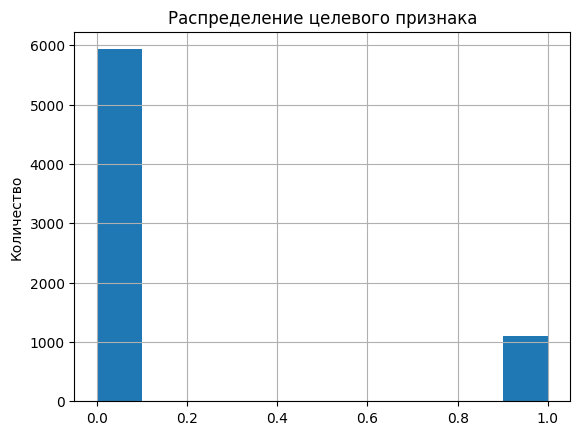

In [ ]:
df.churn.hist()
plt.title('Распределение целевого признака')
plt.ylabel('Количество')
plt.show()

In [ ]:
print('Ушедших клиентов:', round(100*df['churn'].value_counts().loc[1] / len(df), 2), '%')

Ушедших клиентов: 15.66 %


#### Числовые признки в разрезе целевого

In [ ]:
np.round(df.pivot_table(index='churn', values='monthlycharges'), 2)

,monthlycharges
churn,
0,62.80
1,75.55


У ушедших клиентов месячная оплата в среднем больше.

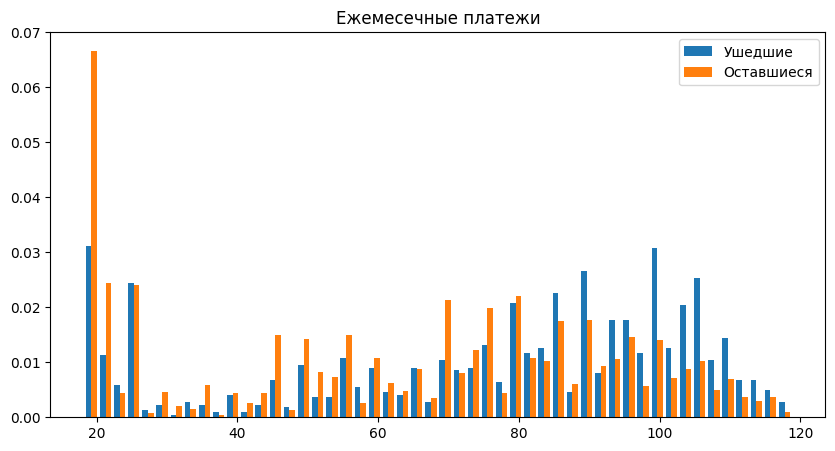

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.hist([df[df.churn==1].monthlycharges, df[df.churn==0].monthlycharges], label=(['Ушедшие', 'Оставшиеся']), density=True, bins=50)
plt.legend()
plt.title('Ежемесечные платежи')
plt.show()

В основном уходят клиенты с месячной платой более 80 у.е.

In [ ]:
np.round(df.pivot_table(index='churn', values='totalcharges'), 2)

,totalcharges
churn,
0,2071.70
1,2371.38


Общая оплата также выше

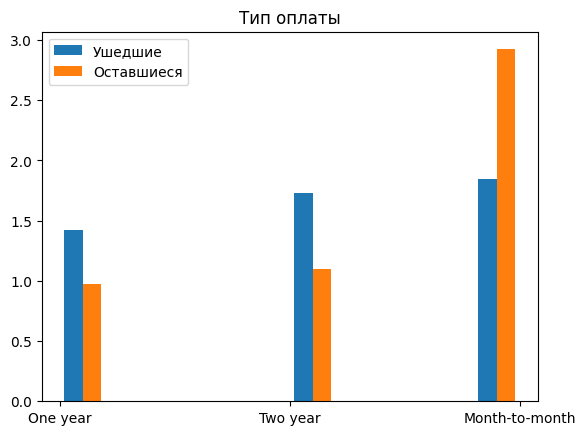

In [ ]:
plt.hist([df[df.churn==1].type, df[df.churn==0].type], label=(['Ушедшие', 'Оставшиеся']), density=True)
plt.legend()
plt.title('Тип оплаты')
plt.show()

В основном уходят клиенты с оплатой сразу за 2 года

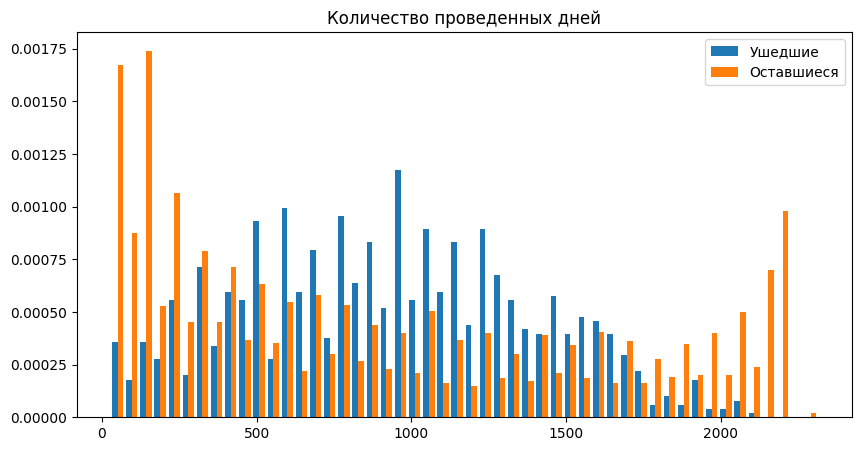

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.hist([df[df.churn==1].daysnumber, df[df.churn==0].daysnumber], label=(['Ушедшие', 'Оставшиеся']), density=True, bins=50)
plt.legend()
plt.title('Количество проведенных дней')
plt.show()

В основном уходят вполне лояльные клиенты, пользующиеся услугами компании от 1,5 до 4 лет

In [ ]:
np.round(df.pivot_table(index='churn', values='daysnumber'))

,daysnumber
churn,
0,895.0
1,925.0


In [ ]:
df.pivot_table(index='churn', values='daysnumber', aggfunc='median')

,daysnumber
churn,
0,702
1,915


Медиана количества дней оставшихся клиентов меньше среднего, значит много новых клиентов.

#### Персональные данные в разрезе целевого признака

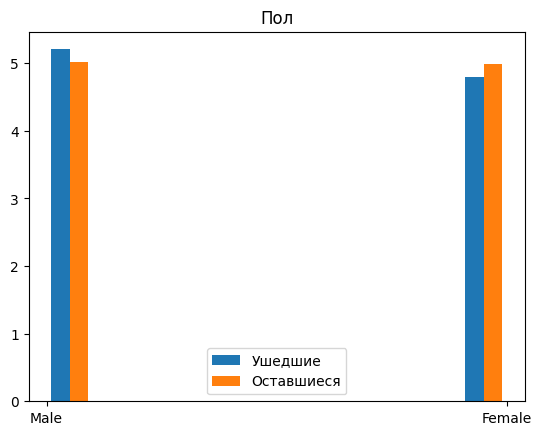

In [ ]:
plt.hist([df[df.churn==1].gender , df[df.churn==0].gender ], label=(['Ушедшие', 'Оставшиеся']), density=True)
plt.legend()
plt.title('Пол')
plt.show()

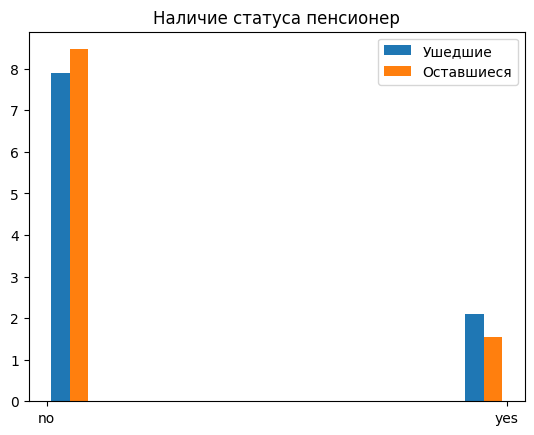

In [ ]:
plt.hist([df[df.churn==1].seniorcitizen , df[df.churn==0].seniorcitizen], label=(['Ушедшие', 'Оставшиеся']), density=True)
plt.legend()
plt.title('Наличие статуса пенсионер')
plt.show()

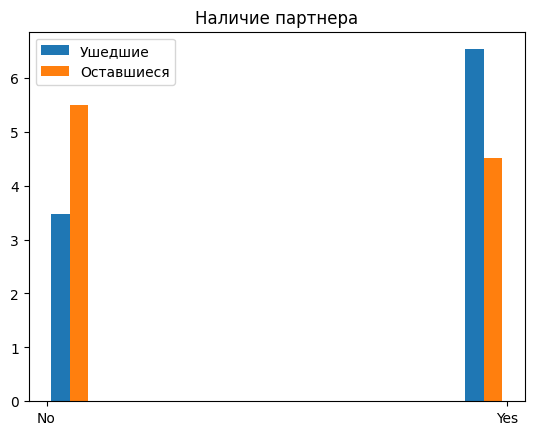

In [ ]:
plt.hist([df[df.churn==1].partner, df[df.churn==0].partner], label=(['Ушедшие', 'Оставшиеся']), density=True)
plt.legend()
plt.title('Наличие партнера')
plt.show()

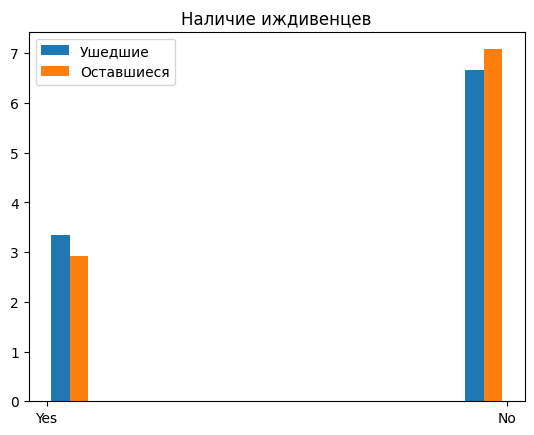

In [ ]:
plt.hist([df[df.churn==1].dependents, df[df.churn==0].dependents], label=(['Ушедшие', 'Оставшиеся']), density=True)
plt.legend()
plt.title('Наличие иждивенцев')
plt.show()

Ушедший клиент в основном мужчина пенсионного возраста с супругой и наличием иждевенцев.

#### Доп опции в разрезе целевого признака

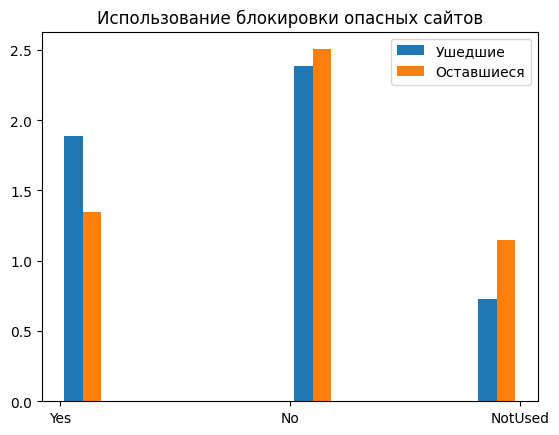

In [ ]:
plt.hist([df[df.churn==1].onlinesecurity, df[df.churn==0].onlinesecurity], label=(['Ушедшие', 'Оставшиеся']), density=True)
plt.legend()
plt.title('Использование блокировки опасных сайтов')
plt.show()

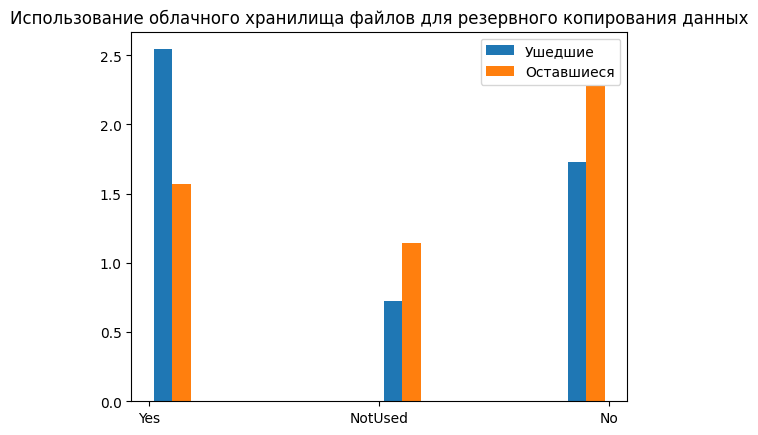

In [ ]:
plt.hist([df[df.churn==1].onlinebackup, df[df.churn==0].onlinebackup], label=(['Ушедшие', 'Оставшиеся']), density=True)
plt.legend()
plt.title('Использование облачного хранилища файлов для резервного копирования данных')
plt.show()

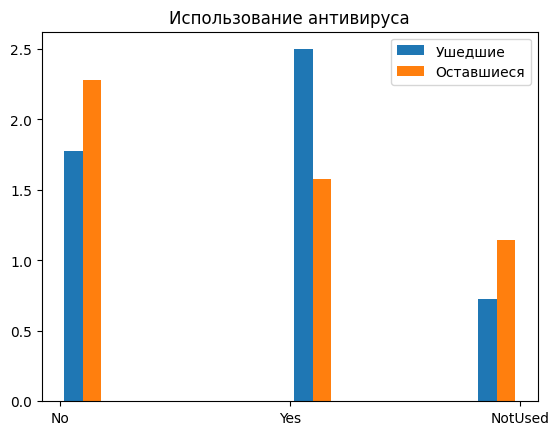

In [ ]:
plt.hist([df[df.churn==1].deviceprotection, df[df.churn==0].deviceprotection], label=(['Ушедшие', 'Оставшиеся']), density=True)
plt.legend()
plt.title('Использование антивируса')
plt.show()

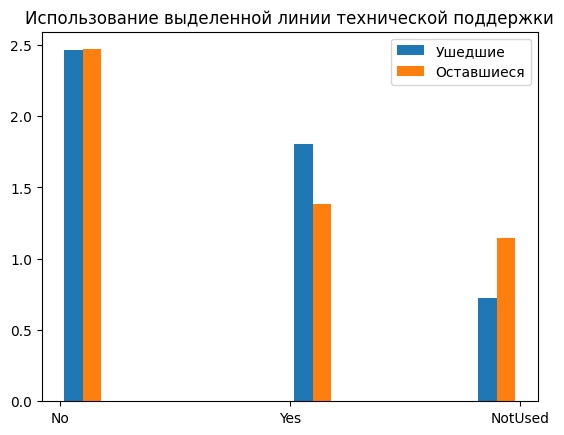

In [ ]:
plt.hist([df[df.churn==1].techsupport, df[df.churn==0].techsupport], label=(['Ушедшие', 'Оставшиеся']), density=True)
plt.legend()
plt.title('Использование выделенной линии технической поддержки')
plt.show()

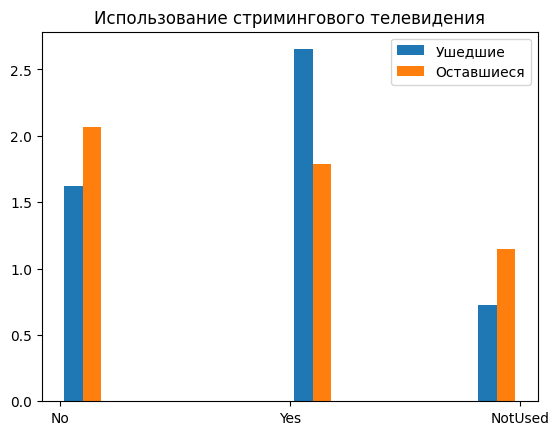

In [ ]:
plt.hist([df[df.churn==1].streamingtv, df[df.churn==0].streamingtv], label=(['Ушедшие', 'Оставшиеся']), density=True)
plt.legend()
plt.title('Использование стримингового телевидения')
plt.show()

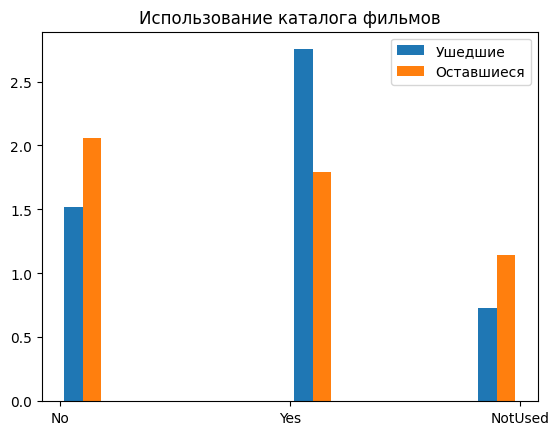

In [ ]:
plt.hist([df[df.churn==1].streamingmovies, df[df.churn==0].streamingmovies], label=(['Ушедшие', 'Оставшиеся']), density=True)
plt.legend()
plt.title('Использование каталога фильмов')
plt.show()

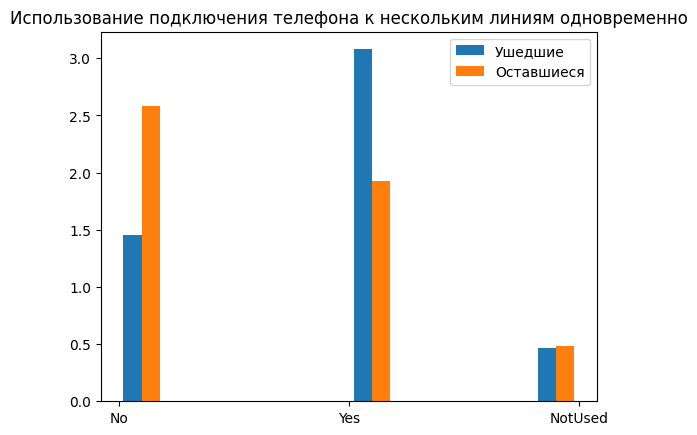

In [ ]:
plt.hist([df[df.churn==1].multiplelines, df[df.churn==0].multiplelines], label=(['Ушедшие', 'Оставшиеся']), density=True)
plt.legend()
plt.title('Использование подключения телефона к нескольким линиям одновременно')
plt.show()

Большая часть ушедших клиентов подключала доп услуги

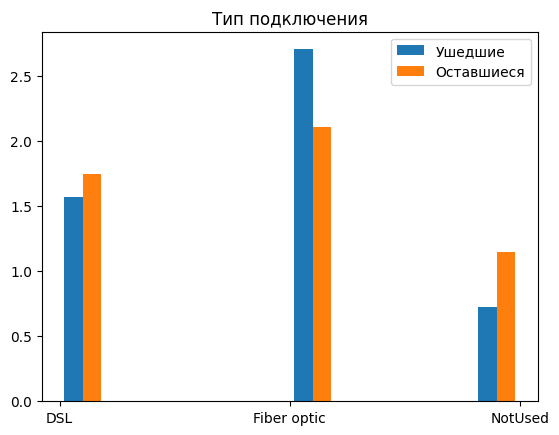

In [ ]:
plt.hist([df[df.churn==1].internetservice, df[df.churn==0].internetservice], label=(['Ушедшие', 'Оставшиеся']), density=True)
plt.legend()
plt.title('Тип подключения')
plt.show()

Большая часть ушедших клиентов - пользователи интернета, а вот в телефонии количество ушедшиъ клиентов гораздо меньше.

#### Анализ признаков на мультиколлинеарность

In [ ]:
phik_cor = df.phik_matrix()

interval columns not set, guessing: ['monthlycharges', 'totalcharges', 'churn', 'daysnumber']


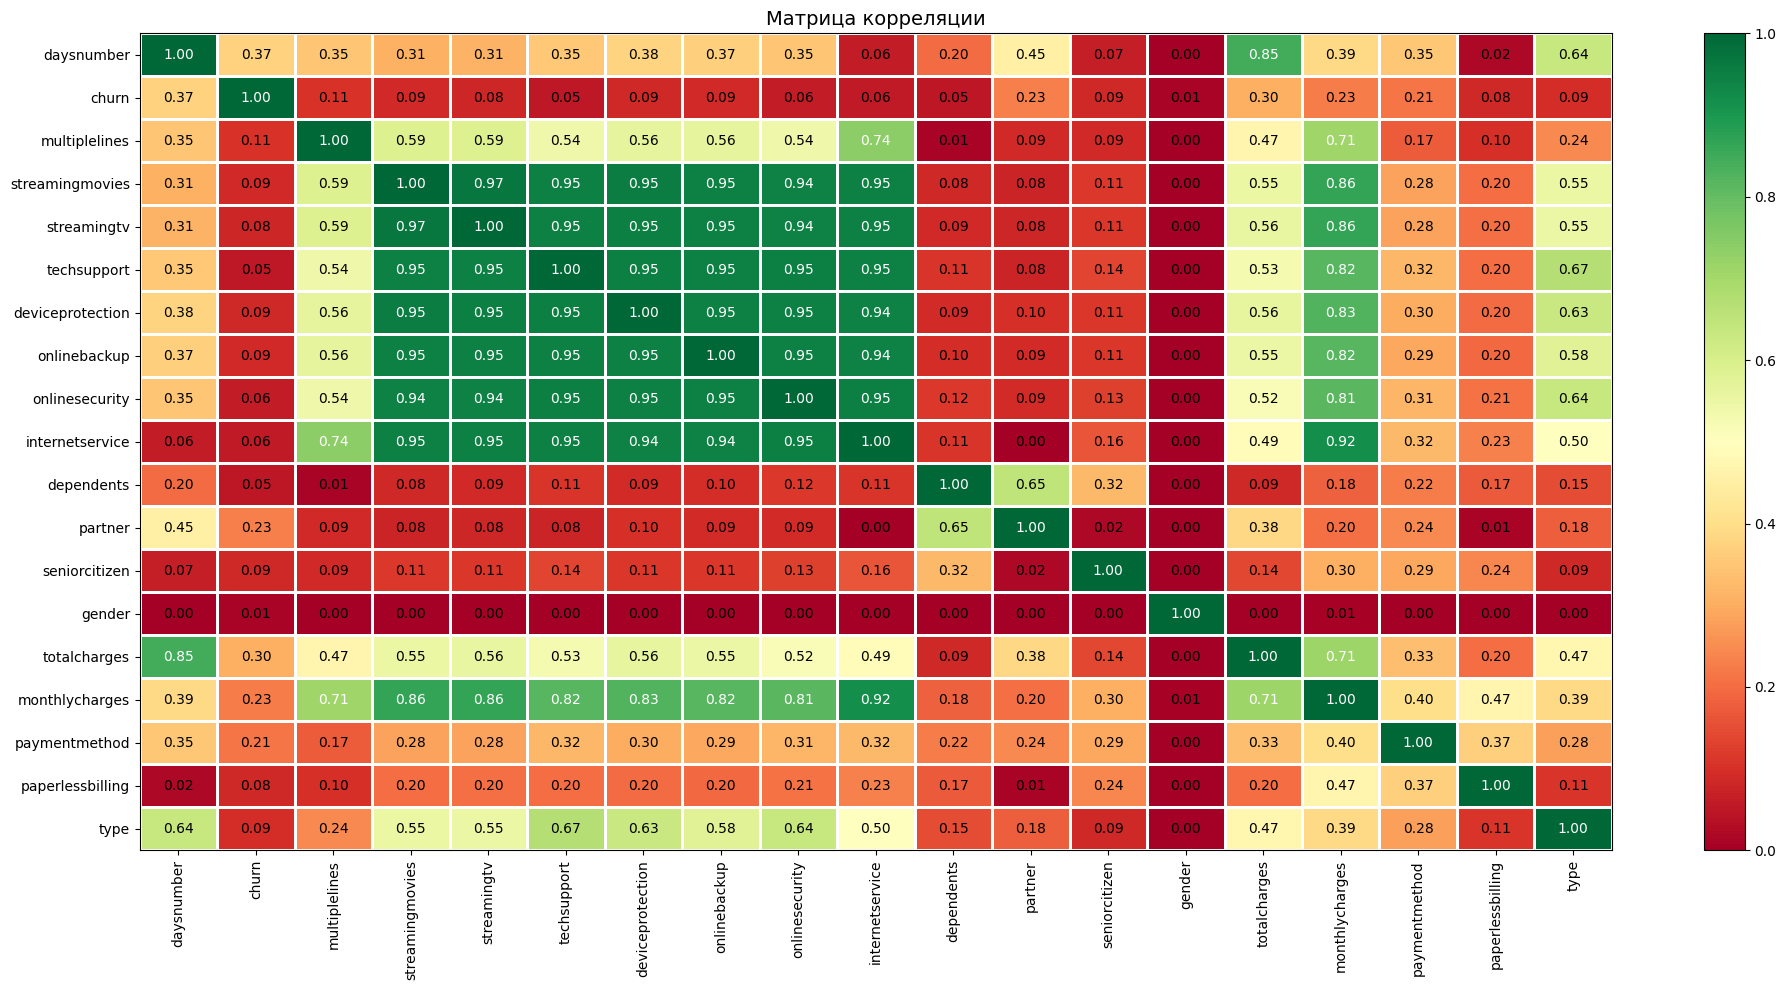

In [ ]:
plot_correlation_matrix(phik_cor.values,
                        x_labels=phik_cor.columns,
                        y_labels=phik_cor.columns,
                        vmin=0,
                        vmax=1,
                        title='Матрица корреляции',
                        figsize=(20, 10))
plt.show()

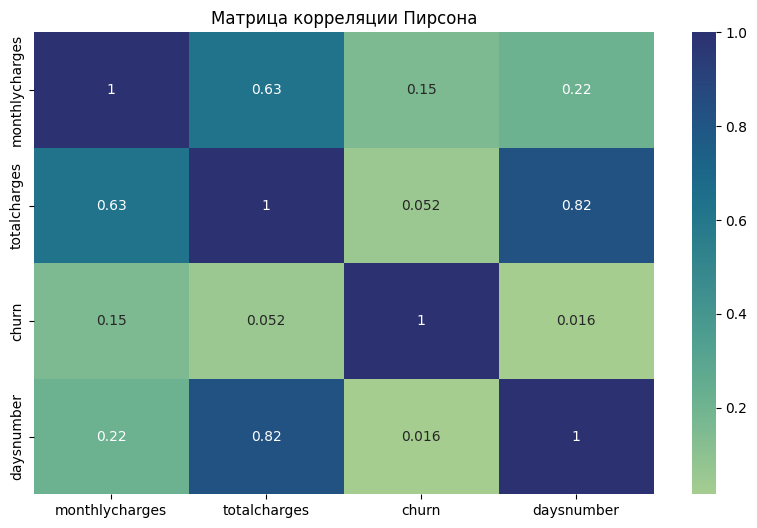

In [ ]:
plt.figure(figsize = (10,6))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            cmap="crest"
            )
plt.title('Матрица корреляции Пирсона')
plt.show()

Видим мультиколлинеарность, но, мультиколлинеарность проблема линейных моделей - могут переобучаться теоретически. Но в логистической и в линейной регрессиях реализована регуляризация, которая решает проблему мультиколлинеарности признаков. Но также другой момент, интерпретируемость линейной модели (мы по коеффициентам судим как признаки влияют на таргет), тут мультиколлинеарность надо убирать.

В случае использования линейной модели и, если она покажет лучшие результаты, в чем я сомневаюсь в данном случае, уберем мультиколлинеарность.

Признак пола можно удалить, ни на что не влияет

In [ ]:
df=df.drop(['gender'], axis=1)

In [ ]:
df.shape

(7032, 18)

### Построение модели

#### Разбиение выборки

In [ ]:
random_state=140823

In [ ]:
target = df['churn']
features = df.drop('churn', axis=1)
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            test_size=0.25,
                                                                            random_state=random_state,
                                                                            stratify=target)

In [ ]:
print(features_train.shape)
print(target_train.shape)

(5274, 17)
(5274,)


Выделим списки категориальных и числовых столбцов

In [ ]:
objects = features_train.select_dtypes(include='object').columns.to_list()
numeric = features_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
display(objects)
display(numeric)

['type',
 'paperlessbilling',
 'paymentmethod',
 'seniorcitizen',
 'partner',
 'dependents',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'multiplelines']

['monthlycharges', 'totalcharges', 'daysnumber']

#### Трансформирование

In [ ]:
transforming = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False), objects)])

#### Пайплайн

In [ ]:
pipeline = Pipeline([
    ('scaler', transforming),
    ('model', None)])

#### Подбор гиперпараметров

In [ ]:
param_grid = [{
        'model': [DecisionTreeClassifier(random_state=random_state)],
        'model__class_weight': ['balanced'],
        'model__max_depth': range(1, 11)
    },
    {
        'model': [RandomForestClassifier(random_state=random_state)],
        'model__class_weight': ['balanced'],
        'model__n_estimators': range(1, 101, 10),
        'model__max_depth': range(1, 6)
    },
    {
        'model': [catboost.CatBoostClassifier(random_state=random_state)],
        'model__auto_class_weights':['Balanced'],
        'model__learning_rate': [0.01, 0.15, 0.3],
        'model__depth': range(1, 6)
    },
    {
        'model': [lightgbm.LGBMClassifier(random_state=random_state)],
        'model__boosting_type': ['gbdt', 'dart', 'rf'],
        'model__class_weight': ['balanced'],
        'model__learning_rate': [0.01, 0.15, 0.3],
        'model__max_depth': range(1, 6),
        'model__n_estimators': range(1, 101, 10)}]

#### Обучение модели

In [ ]:
grid = GridSearchCV(pipeline,
                    param_grid,
                    cv = 5,
                    scoring='roc_auc',
                    n_jobs=-1,
                    verbose= False)
grid.fit(features_train, target_train)

0:	learn: 0.6665842	total: 48.6ms	remaining: 48.5s
1:	learn: 0.6278980	total: 50.5ms	remaining: 25.2s
2:	learn: 0.6106108	total: 52.3ms	remaining: 17.4s
3:	learn: 0.5833668	total: 54.3ms	remaining: 13.5s
4:	learn: 0.5665774	total: 56.3ms	remaining: 11.2s
5:	learn: 0.5570480	total: 58.1ms	remaining: 9.62s
6:	learn: 0.5493008	total: 60.2ms	remaining: 8.53s
7:	learn: 0.5418394	total: 61.9ms	remaining: 7.68s
8:	learn: 0.5355171	total: 64.1ms	remaining: 7.05s
9:	learn: 0.5277960	total: 66.3ms	remaining: 6.57s
10:	learn: 0.5237534	total: 68.5ms	remaining: 6.16s
11:	learn: 0.5212250	total: 70.2ms	remaining: 5.78s
12:	learn: 0.5149059	total: 72ms	remaining: 5.46s
13:	learn: 0.5123123	total: 73.8ms	remaining: 5.2s
14:	learn: 0.5096053	total: 75.8ms	remaining: 4.98s
15:	learn: 0.5079880	total: 77.7ms	remaining: 4.78s
16:	learn: 0.5045735	total: 79.9ms	remaining: 4.62s
17:	learn: 0.5038910	total: 81.4ms	remaining: 4.44s
18:	learn: 0.5021744	total: 83.5ms	remaining: 4.31s
19:	learn: 0.5013338	tota

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['monthlycharges',
                                                                          'totalcharges',
                                                                          'daysnumber']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['type',
                                                                          'paperlessbilling',
                                                                          'paymentmethod',
                                                                          'seniorcitizen',
                                                                          'partner',
                                                                          'dependents',
                                                                          'internetservice',
                                                                          'onlinesecurity',
                                                                          'on...
                          'model__auto_class_weights': ['Balanced'],
                          'model__depth': range(1, 6),
                          'model__learning_rate': [0.01, 0.15, 0.3]},
                         {'model': [LGBMClassifier(random_state=140823)],
                          'model__boosting_type': ['gbdt', 'dart', 'rf'],
                          'model__class_weight': ['balanced'],
                          'model__learning_rate': [0.01, 0.15, 0.3],
                          'model__max_depth': range(1, 6),
                          'model__n_estimators': range(1, 101, 10)}],
             scoring='roc_auc', verbose=False)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'model': <catboost.core.CatBoostClassifier object at 0x7fbaf8d50f10>, 'model__auto_class_weights': 'Balanced', 'model__depth': 2, 'model__learning_rate': 0.3}
0.9140886798780855


Лучшей моделью оказалась CatBoostClassifier с параметрами:

     

*   random_state=140823,
*   auto_class_weights = 'Balanced',
*   depth= 2,
*   learning_rate= 0.3,
*   verbose = False

ROC-AUC: 0.9140886798780855








#### Проверка модели

In [ ]:
thebest = catboost.CatBoostClassifier(random_state=random_state, auto_class_weights = 'Balanced', depth= 2,  learning_rate = 0.3, cat_features=objects, verbose = False)
thebest.fit(features_train, target_train)

print('Accuracy на тестовой выборке:', accuracy_score(thebest.predict(features_test), target_test))
print('ROC-AUC на тестовой выборке:', roc_auc_score(target_test, thebest.predict_proba(features_test)[:, -1]))

Accuracy на тестовой выборке: 0.8742889647326507
ROC-AUC на тестовой выборке: 0.9302887267823209


#### Матрица ошибок

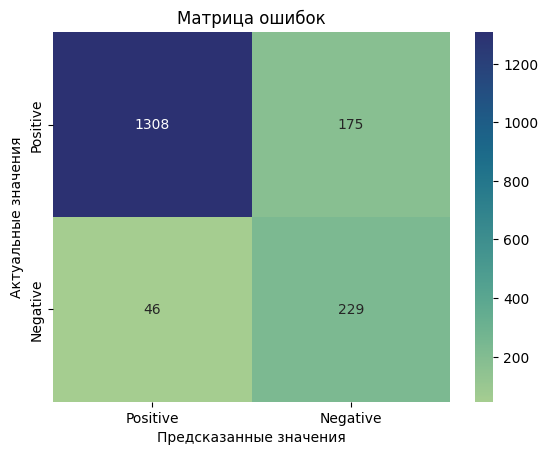

Всего значений: 1758


In [ ]:
prediction = thebest.predict(features_test)
a = confusion_matrix(target_test, prediction)
ax = sns.heatmap(a, annot= True, fmt='d', cmap="crest")
ax.set_xlabel('Предсказанные значения')
ax.set_ylabel('Актуальные значения');
ax.xaxis.set_ticklabels(['Positive','Negative'])
ax.yaxis.set_ticklabels(['Positive','Negative'])
plt.title('Матрица ошибок')
plt.show()
print('Всего значений:', target_test.shape[0])

Истинно-положительных значений: 1308,

истинно-отрицательных: 229,

ложно-положительных значений (ошибка типа 1): 46,

ложно-отрицательных (ошибка Типа 2) 175.

#### Важность признаков

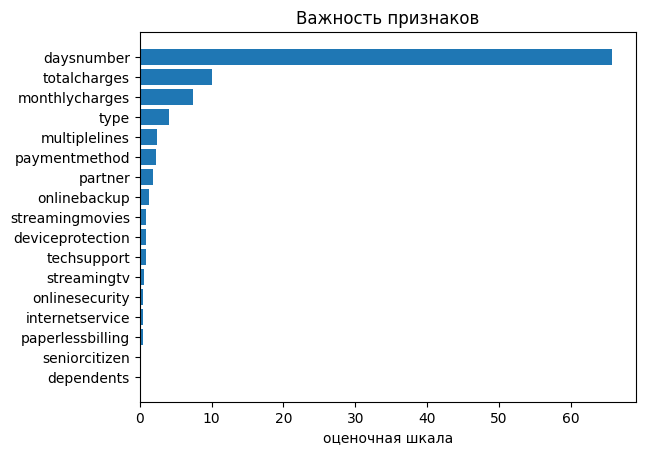

In [ ]:
features=features_test.columns
importances = thebest.feature_importances_
indices = np.argsort(importances)

plt.figure()
plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('оценочная шкала')
plt.show()

Самым важным признаком оказалось количество дней, проведенных в компании

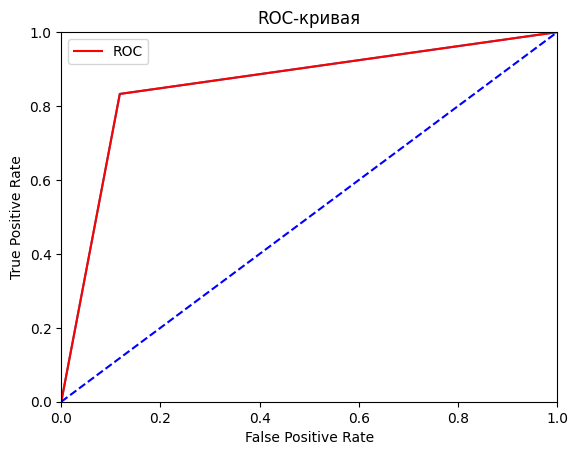

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, prediction)

plt.plot(fpr, tpr)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

### Вывод

Лучшей моделью оказалась CatBoostClassifier с параметрами:

random_state=140823,
auto_class_weights = 'Balanced',
depth= 2,
learning_rate= 0.3,
verbose = False

ROC-AUC на тестовой выборке: 0.9302887267823209



## Отчет

### Какие пункты плана были выполнены, а какие — нет. Почему?

В ходе работы были выполнены все пункты изначально намеченного плана.

### Какие трудности возникли и как вы их преодолели?

Проект не вызвал трудностей при выполнении.

### Какие ключевые шаги в решении задачи вы выделили?



1.  Исследование данных в разрезе целевого признака;
2.  Построение и отбор признаков для машинного обучения;
3.  Подбор гиперпараметров.



### Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена?

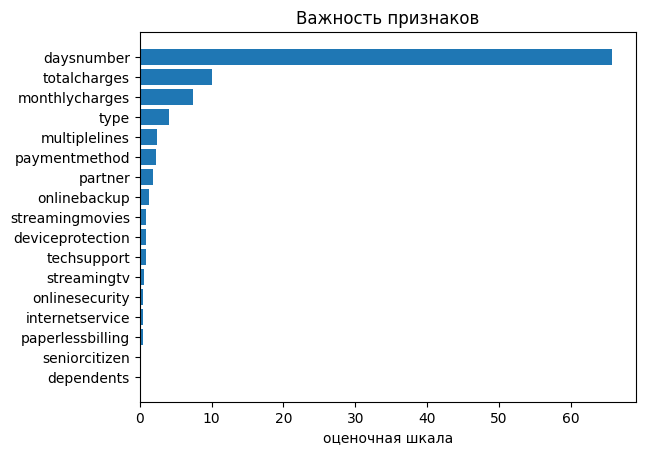

На изображении отражены все признаки, учавствующие в построение модели, в порядке убывания важности.

Наиважнейшим признаком стала информация о количестве дней, проведенных клиентом с компанией, сгенерированная на основе имеющихся в нашем распоряжении столбцов с датой начала и конца использования контракта.

Целевой признак был создан на основе данных о последней дате контракта.

Пропуски в столбцах с дополнительными опциями были заменены на 'NotUsed', в столбце 'TotalCharges' пропуски были удалены.



### Какая ваша итоговая модель, какие у неё гиперпараметы и какое качество?

Итоговая модель CatBoostClassifier с параметрами:

* random_state=140823,
* auto_class_weights = 'Balanced',
* depth= 2,
* learning_rate= 0.3,
* verbose = False


---



Метрика ROC-AUC на тренировочной выборке с кроссвалидацией: 0.9140886798780855

Метрика ROC-AUC на тестовой выборке: 0.9302887267823209

Точность предсказаний модели (Accuracy) на тестовой выборке порядка 87%